In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ETH-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1586,2022-03-14,2518.486328,2604.034424,2505.299316,2590.696045,2590.696045,11244398839
1587,2022-03-15,2590.668945,2662.329590,2515.765869,2620.149658,2620.149658,12861105614
1588,2022-03-16,2620.028564,2781.307129,2610.764404,2772.055664,2772.055664,17915109769
1589,2022-03-17,2771.964111,2826.160645,2751.560791,2814.854492,2814.854492,12685265194


In [5]:
df =df.set_index(pd.DatetimeIndex(df['Date'].values))

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2017-11-09,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2022-03-14,2022-03-14,2518.486328,2604.034424,2505.299316,2590.696045,2590.696045,11244398839
2022-03-15,2022-03-15,2590.668945,2662.329590,2515.765869,2620.149658,2620.149658,12861105614
2022-03-16,2022-03-16,2620.028564,2781.307129,2610.764404,2772.055664,2772.055664,17915109769
2022-03-17,2022-03-17,2771.964111,2826.160645,2751.560791,2814.854492,2814.854492,12685265194


In [9]:
#Create a func to get SMA
def SMA(data,period=30,column="Close"):
    return data[column].rolling(window=period).mean()

In [10]:
# cfreate new columns to store short term SMA and long term SMA
df['ShortSMA'] = SMA(df,50)
df['LongSMA'] = SMA(df,200)

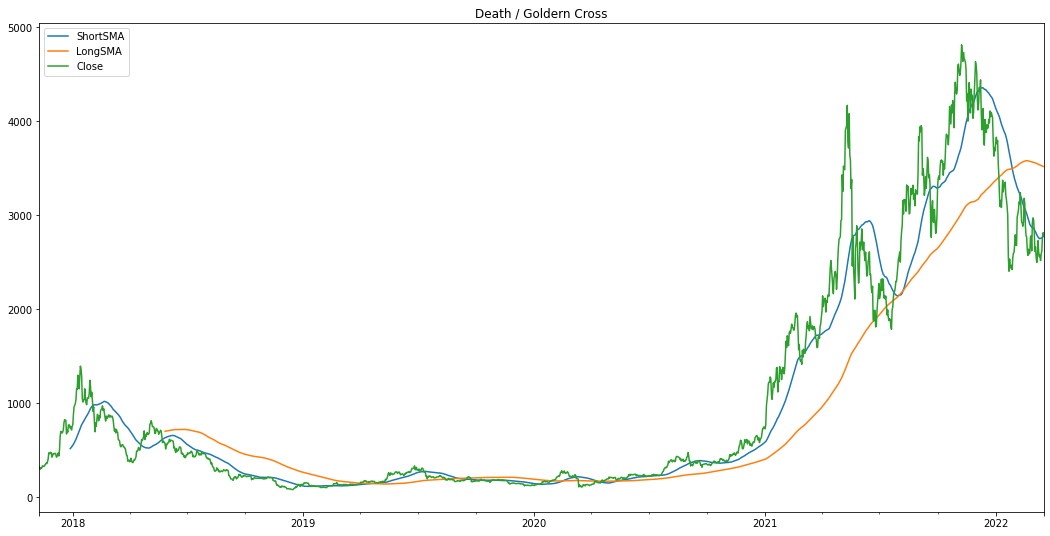

In [12]:
#create list of columns to show
column_list = ['ShortSMA','LongSMA','Close']
df[column_list].plot(figsize=(18,9))
plt.title('Death / Goldern Cross')
plt.show();

In [13]:
# create a func to see the dates of each death cross and goldern cross
def death_golden_cross():
    
    first_cross = 0
    for i in range(0,len(df)):
        if df['ShortSMA'][i] < df['LongSMA'][i] and first_cross == 0:
            print('Death cross on day', df.index[i], ': except the price to continue to fall')
            first_cross = 1
        elif df['ShortSMA'][i] > df['LongSMA'][i] and first_cross == 1:
            print('Golden cross on day', df.index[i], ': except the price to continue to rise')
            first_cross = 0


In [15]:
#show dates of each death and golden cross
death_golden_cross()

Death cross on day 2018-05-27 00:00:00 : except the price to continue to fall
Golden cross on day 2019-04-19 00:00:00 : except the price to continue to rise
Death cross on day 2019-09-05 00:00:00 : except the price to continue to fall
Golden cross on day 2020-02-16 00:00:00 : except the price to continue to rise
Death cross on day 2020-04-11 00:00:00 : except the price to continue to fall
Golden cross on day 2020-05-13 00:00:00 : except the price to continue to rise
Death cross on day 2021-08-02 00:00:00 : except the price to continue to fall
Golden cross on day 2021-08-08 00:00:00 : except the price to continue to rise
Death cross on day 2022-01-28 00:00:00 : except the price to continue to fall
